# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 748 files belonging to 8 classes.
['Bacteria', 'Dried Leaf', 'Fungi', 'Healthy', 'Nematode', 'Pest', 'Phytopthora', 'Virus']


# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

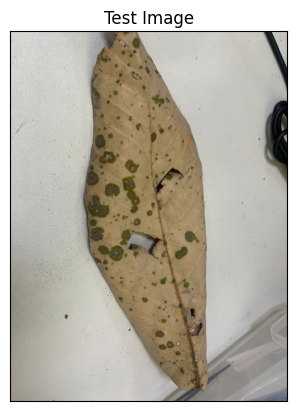

In [ ]:
#Test Image Visualization
import cv2
image_path = 'test/1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [19]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


In [20]:
print(predictions)

[[5.6705644e-06 1.8469295e-04 7.8517944e-01 9.2103028e-06 6.3422311e-05
  1.1888582e-03 6.5689296e-06 2.4925651e-02 3.5263906e-06 1.1891286e-03
  6.8350373e-06 4.7231570e-05 2.5803840e-04 2.1405661e-04 3.3691792e-06
  1.1428820e-05 2.5916616e-02 6.0902374e-05 1.7584636e-05 3.8402766e-05
  1.9234179e-05 2.2433464e-05 5.6548517e-05 1.8949596e-04 1.4333651e-05
  1.3198052e-04 6.5231092e-02 2.0275857e-07 8.2542628e-02 2.9101456e-03
  7.3555550e-03 1.5581307e-05 4.5582303e-04 6.4550786e-06 1.0157387e-03
  3.3904982e-04 1.2505571e-04 2.3801551e-04]]


In [21]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


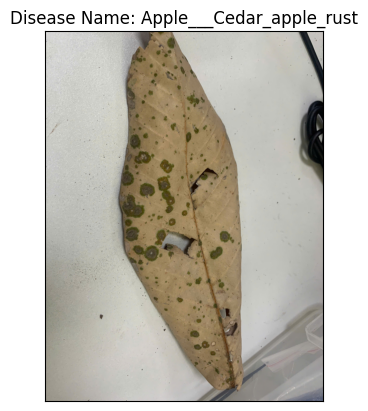

In [22]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()